# Import Library yang dibutuhkan

In [3]:
import pandas as pd
from scipy import stats
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

# Pemrosesan Data

In [4]:
full_data = pd.read_csv('income.csv')
df_inc_car = full_data[['Income','Car price']]
df_inc_car

,Income,Car price
0,72.0,37.0
1,153.0,76.0
2,28.0,13.9
3,26.0,13.0
4,23.0,11.3
...,...,...
6395,207.0,85.3
6396,60.0,30.8
6397,59.0,29.1
6398,44.0,21.8


In [5]:
df_income = df_inc_car[['Income']]
df_income

,Income
0,72.0
1,153.0
2,28.0
3,26.0
4,23.0
...,...
6395,207.0
6396,60.0
6397,59.0
6398,44.0


In [6]:
df_car = df_inc_car[['Car price']]
df_car

,Car price
0,37.0
1,76.0
2,13.9
3,13.0
4,11.3
...,...
6395,85.3
6396,30.8
6397,29.1
6398,21.8


In [7]:
# menghitung statistik data sampel Income

n = len(df_income)
x_bar = df_income.mean()
s = df_income.std() # method ini digunakan untuk stdev sampel (default pandas telah menggunakan n-1)

print("Total data sampel\t: {}".format(n))
print("Rata-rata data sampel\t: {}".format(x_bar.iloc[0]))
print("Stdev data sampel\t: {}".format(s.iloc[0]))

Total data sampel	: 6400
Rata-rata data sampel	: 69.88703125
Stdev data sampel	: 77.99393243336522


# Visualisasi Data

## Sebaran Data Income dan Car Price

In [8]:
q1 = df_income.describe().loc["25%"]
q3 = df_income.describe().loc["75%"]
income_iqr = q3 - q1
income_iqr

Income    52.0
dtype: float64

In [9]:
q1_car = df_car.describe().loc["25%"]
q3_car = df_car.describe().loc["75%"]
car_iqr = q3 - q1
car_iqr

Income    52.0
dtype: float64

In [10]:
income_bin_size = int(2*income_iqr/(n**(1/3)))
car_price_bins_size = int(2*car_iqr/(n**(1/3)))

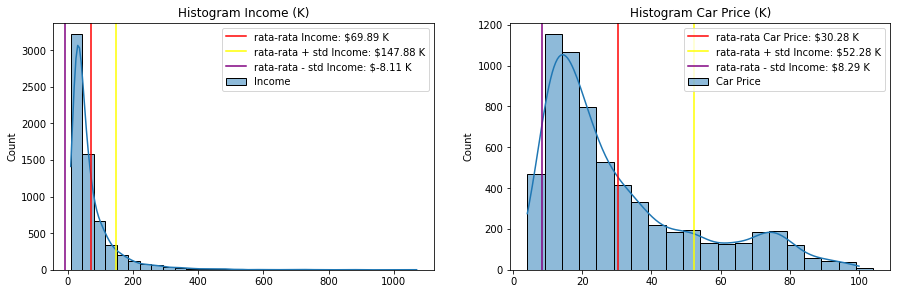

In [11]:
plt.figure(figsize=(15,10))

plt.subplot(221)
plt.title("Histogram Income (K)")
sns.histplot(df_income,kde=True,bins=30,label='Income')
# Garis Rata - Rata
plt.axvline(df_income.mean()[0],color='red',label=f'rata-rata Income: ${round((df_income.mean()[0]),2)} K')
# Garis Rata - Rata + Std
plt.axvline(df_income.mean()[0]+df_income.std(ddof=1)[0],color='yellow',label=f'rata-rata + std Income: ${round((df_income.mean()[0]+df_income.std(ddof=1)[0]),2)} K')
# Garis Rata - Rata - Std
plt.axvline(df_income.mean()[0]-df_income.std(ddof=1)[0],color='purple',label=f'rata-rata - std Income: ${round((df_income.mean()[0]-df_income.std(ddof=1)[0]),2)} K')
plt.legend()

plt.subplot(222)
plt.title("Histogram Car Price (K)")
sns.histplot(df_car,kde=True,binwidth=car_price_bins_size,label='Car Price')
# Garis Rata - Rata
plt.axvline(df_car.mean()[0],color='red',label=f'rata-rata Car Price: ${round((df_car.mean()[0]),2)} K')
# Garis Rata - Rata + Std
plt.axvline(df_car.mean()[0]+df_car.std(ddof=1)[0],color='yellow',label=f'rata-rata + std Income: ${round((df_car.mean()[0]+df_car.std(ddof=1)[0]),2)} K')
# Garis Rata - Rata - Std
plt.axvline(df_car.mean()[0]-df_car.std(ddof=1)[0],color='purple',label=f'rata-rata - std Income: ${round((df_car.mean()[0]-df_car.std(ddof=1)[0]),2)} K')
plt.legend()

plt.show()

In [12]:
median_income = df_income.describe().loc['50%']
median_car = df_car.describe().loc['50%']

In [13]:
data_terkecil_income = df_income.describe().loc['min'][0]
data_terkecil_car = df_car.describe().loc['min'][0]
q1_income,q3_income = df_income.describe().loc['25%'][0],df_income.describe().loc['75%'][0]
q1_car,q3_car = df_car.describe().loc['25%'][0],df_car.describe().loc['75%'][0]
rata_income,rata_car = round(df_income.mean(),2),round(df_car.mean(),2)
batas_atas_income = q3_income + 1.5*income_iqr[0]

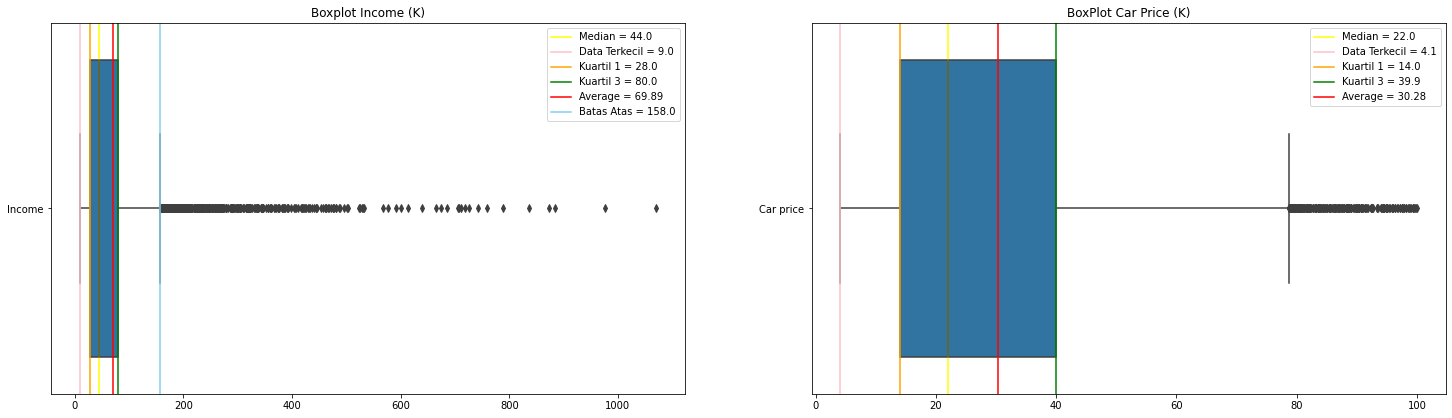

In [14]:
plt.figure(figsize=(25,15))
# BoxPlot Income
plt.subplot(221)
plt.ticklabel_format(style='plain')
plt.title("Boxplot Income (K)")
sns.boxplot(data=df_income,orient='h')
plt.axvline(median_income[0],color='yellow',label=f'Median = {median_income[0]}')
plt.axvline(data_terkecil_income,color='pink',label=f'Data Terkecil = {data_terkecil_income}')
plt.axvline(q1_income,color='orange',label=f'Kuartil 1 = {q1_income}')
plt.axvline(q3_income,color='green',label=f'Kuartil 3 = {q3_income}')
plt.axvline(rata_income[0],color='red',label=f'Average = {rata_income[0]}')
plt.axvline(batas_atas_income,color='skyblue',label=f'Batas Atas = {batas_atas_income}')

plt.legend()


# BoxPlot Car Price
plt.subplot(222)
plt.ticklabel_format(style='plain')
plt.title("BoxPlot Car Price (K)")
sns.boxplot(data=df_car,orient='h')
plt.axvline(median_car[0],color='yellow',label=f'Median = {median_car[0]}')
plt.axvline(data_terkecil_car,color='pink',label=f'Data Terkecil = {data_terkecil_car}')
plt.axvline(q1_car,color='orange',label=f'Kuartil 1 = {q1_car}')
plt.axvline(q3_car,color='green',label=f'Kuartil 3 = {q3_car}')
plt.axvline(rata_car[0],color='red',label=f'Average = {rata_car[0]}')

plt.legend()
plt.show()

## Estimasi 1 sisi dari bawah berdasarkan rataan sampel Income 

In [15]:
def estimasi_sisi_dari_bawah(x_bar,s,alpha):
    z_alpha = stats.norm.ppf(1-alpha, loc=0, scale=1)
    batas_bawah = x_bar - z_alpha * s / np.sqrt(n)
    return batas_bawah


def estimasi_sisi_dari_atas(x_bar,s,alpha):
    z_alpha = stats.norm.ppf(1-alpha, loc=0, scale=1)
    batas_atas = x_bar + z_alpha * s / np.sqrt(n)
    return batas_atas

In [16]:
# menghitung estimasi 1 sisi dari bawah interval rataan populasi berdasarkan rataan sampel Income
alpha = 0.01
# mencari nilai z_alpha sehingga P(Z>z_alpha) = 1 - alpha
z_alpha = stats.norm.ppf(1-alpha, loc=0, scale=1)

# menghitung batas bawah
batas_bawah_rataan_sampel_99 = x_bar - z_alpha * s / np.sqrt(n)

print("Estimasi 1 sisi dari atas rataan populasi")
print("-------------------------------")
print("Total data sampel\t: {}".format(n))
print("Rata-rata data sampel\t: {}".format(x_bar.iloc[0]))
print("Stdev data sampel\t: {}".format(s.iloc[0]))
print("\n")
print("Tingkat kepercayaan estimasi\t: {}".format(1-alpha))
print("Batas bawah interval estimasi\t: {}".format(batas_bawah_rataan_sampel_99.iloc[0]))

Estimasi 1 sisi dari atas rataan populasi
-------------------------------
Total data sampel	: 6400
Rata-rata data sampel	: 69.88703125
Stdev data sampel	: 77.99393243336522


Tingkat kepercayaan estimasi	: 0.99
Batas bawah interval estimasi	: 67.61901851369446


c:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


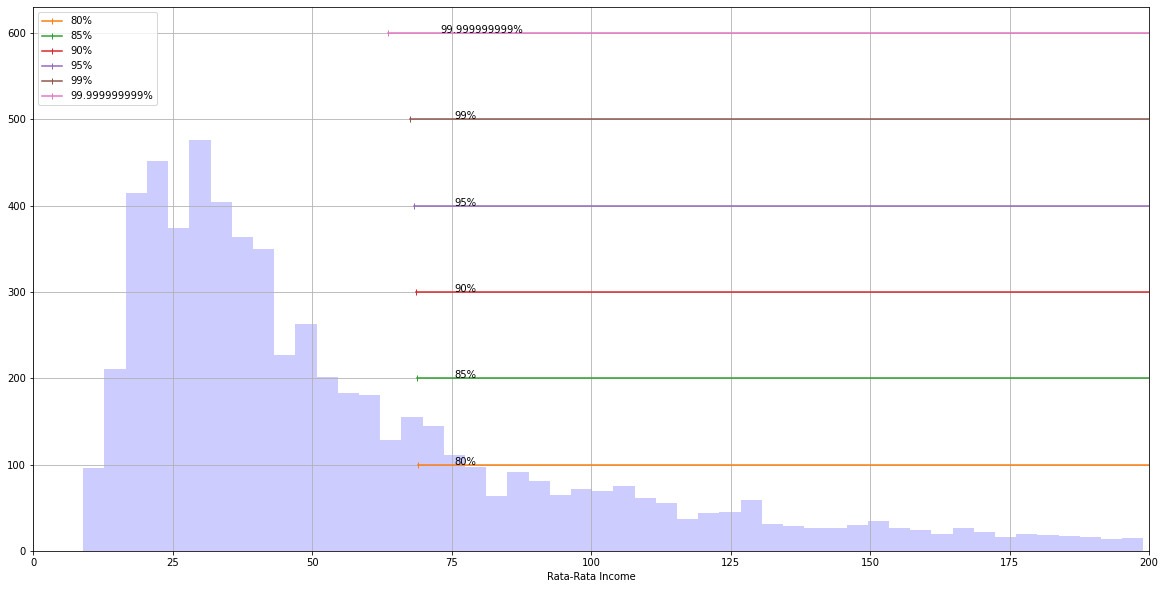

In [17]:
batas_bawah_rataan_sampel_80 = estimasi_sisi_dari_bawah(x_bar,  s, 0.2)
batas_atas_rataan_sampel_80 = estimasi_sisi_dari_atas(x_bar, s, 0.2)

batas_bawah_rataan_sampel_85 = estimasi_sisi_dari_bawah(x_bar, s, 1-0.85)
batas_atas_rataan_sampel_85 = estimasi_sisi_dari_atas(x_bar, s, 1-0.85)

batas_bawah_rataan_sampel_90 = estimasi_sisi_dari_bawah(x_bar, s, 1-0.9)
batas_atas_rataan_sampel_90 = estimasi_sisi_dari_atas(x_bar, s, 1-0.9)

batas_bawah_rataan_sampel_95 = estimasi_sisi_dari_bawah(x_bar, s, 1-0.95)
batas_atas_rataan_sampel_95 = estimasi_sisi_dari_atas(x_bar, s, 1-0.95)

batas_bawah_rataan_sampel_99 = estimasi_sisi_dari_bawah(x_bar,s,1-0.99)
batas_atas_rataan_sampel_99 = estimasi_sisi_dari_atas(x_bar,s,1-0.99)

batas_bawah_rataan_sampel_100 = estimasi_sisi_dari_bawah(x_bar,s,1-0.9999999999)
batas_atas_rataan_sampel_100 = estimasi_sisi_dari_atas(x_bar,s,1-0.99999999999)
max_ = df_income.max()[0]

plt.figure(figsize=(20,10))
df_income_view = df_income[df_income.iloc[:] < 200]
plt.hist(df_income_view, bins=50, fc=(0,0,1,0.2))
plt.plot([batas_bawah_rataan_sampel_80,max_],[100,100],marker='|',label='80%')
plt.plot([batas_bawah_rataan_sampel_85,max_],[200,200],marker='|',label='85%')
plt.plot([batas_bawah_rataan_sampel_90,max_],[300,300],marker='|',label='90%')
plt.plot([batas_bawah_rataan_sampel_95,max_],[400,400],marker='|',label='95%')
plt.plot([batas_bawah_rataan_sampel_99,max_],[500,500],marker='|',label='99%')
plt.plot([batas_bawah_rataan_sampel_100,max_],[600,600],marker='|',label='99.999999999%')

plt.text(75.5,100,'80%')
plt.text(75.5,200,'85%')
plt.text(75.5,300,'90%')
plt.text(75.5,400,'95%')
plt.text(75.5,500,'99%')
plt.text(73,  600,'99.999999999%')
plt.xlim((0,200))
plt.xlabel('Rata-Rata Income')

plt.legend()
plt.grid()
plt.show()

## Menghitung estimasi 2 sisi interval standar deviasi populasi berdasarkan rataan sampel Income

In [18]:
# menghitung estimasi 2 sisi interval standar deviasi populasi berdasarkan rataan sampel Income

alpha = 0.05
df = n-1

# mencari nilai c_alpha_half sehingga P(Chi<c_alpha_half) = 1 - alpha/2
c_alpha_half = stats.chi2.ppf(1-alpha/2, df)
# mencari nilai c_alpha_half sehingga P(Chi<c_alpha_half) = alpha/2
c_one_min_alpha_half = stats.chi2.ppf(alpha/2, df)

# menghitung batas bawah dan batas atas
batas_bawah = s * np.sqrt(df/c_alpha_half)
batas_atas = s * np.sqrt(df/c_one_min_alpha_half)

print("Estimasi 2 sisi st dev populasi Income")
print("-------------------------------")
print("Total data sampel\t: {}".format(n))
print("Rata-rata data sampel\t: {}".format(x_bar.iloc[0]))
print("Stdev data sampel\t: {}".format(s.iloc[0]))
print("\n")
print("Tingkat kepercayaan estimasi\t: {}".format(1-alpha))
print("Batas bawah interval estimasi\t: {}".format(batas_bawah.iloc[0]))
print("Batas atas interval estimasi\t: {}".format(batas_atas.iloc[0]))

Estimasi 2 sisi st dev populasi Income
-------------------------------
Total data sampel	: 6400
Rata-rata data sampel	: 69.88703125
Stdev data sampel	: 77.99393243336522


Tingkat kepercayaan estimasi	: 0.95
Batas bawah interval estimasi	: 76.66587616791233
Batas atas interval estimasi	: 79.36914351821885


In [19]:
# menghitung statistik data sampel Car Price

n_car = len(df_car)
x_bar_car = df_car.mean()
s_car = df_car.std() # method ini digunakan untuk stdev sampel

print("Total data sampel\t: {}".format(n_car))
print("Rata-rata data sampel\t: {}".format(x_bar_car.iloc[0]))
print("Stdev data sampel\t: {}".format(s_car.iloc[0]))

Total data sampel	: 6400
Rata-rata data sampel	: 30.283625
Stdev data sampel	: 21.998228003691366


In [20]:
# menghitung estimasi 1 sisi dari atas interval rataan populasi berdasarkan rataan sampel Car Price

alpha = 0.01
# mencari nilai z_alpha sehingga P(Z>z_alpha) = 1 - alpha
z_alpha = stats.norm.ppf(1-alpha, loc=0, scale=1)

# menghitung batas atas
batas_atas = x_bar_car + z_alpha * s_car / np.sqrt(n_car)

print("Estimasi 1 sisi dari atas rataan populasi Car price")
print("-------------------------------")
print("Total data sampel\t: {}".format(n_car))
print("Rata-rata data sampel\t: {}".format(x_bar_car.iloc[0]))
print("Stdev data sampel\t: {}".format(s_car.iloc[0]))
print("\n")
print("Tingkat kepercayaan estimasi\t: {}".format(1-alpha))
print("Batas atas interval estimasi\t: {}".format(batas_atas.iloc[0]))

Estimasi 1 sisi dari atas rataan populasi Car price
-------------------------------
Total data sampel	: 6400
Rata-rata data sampel	: 30.283625
Stdev data sampel	: 21.998228003691366


Tingkat kepercayaan estimasi	: 0.99
Batas atas interval estimasi	: 30.923319136863164


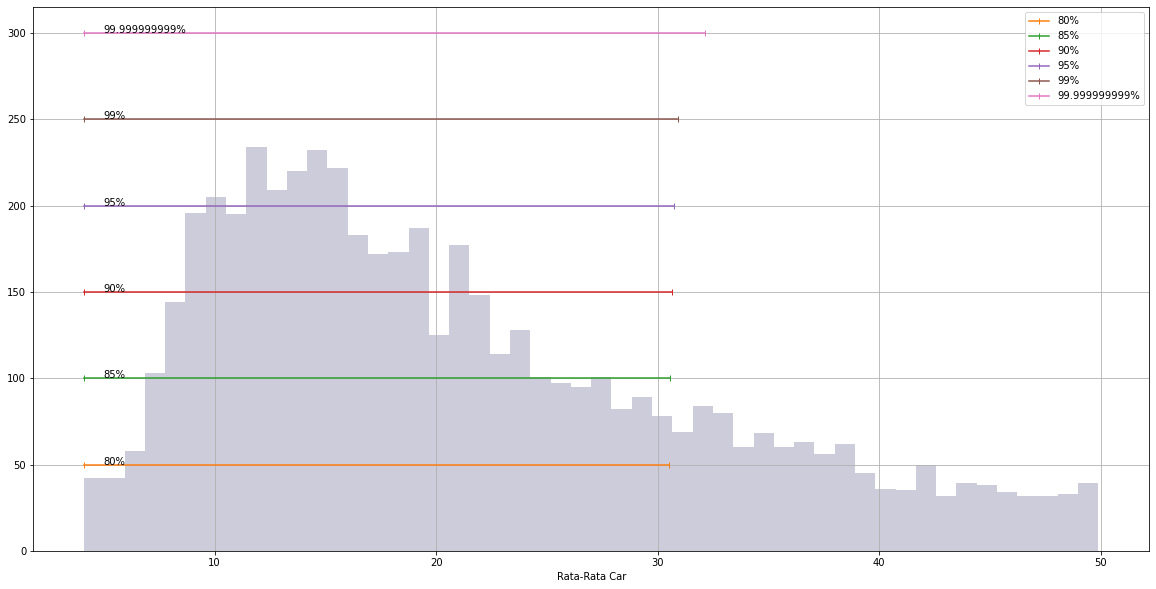

In [21]:
batas_bawah_rataan_sampel_80 = estimasi_sisi_dari_bawah(x_bar_car, s_car, 0.2)
batas_atas_rataan_sampel_80 = estimasi_sisi_dari_atas(x_bar_car, s_car, 0.2)

batas_bawah_rataan_sampel_85 = estimasi_sisi_dari_bawah(x_bar_car, s_car, 1-0.85)
batas_atas_rataan_sampel_85 = estimasi_sisi_dari_atas(x_bar_car, s_car, 1-0.85)

batas_bawah_rataan_sampel_90 = estimasi_sisi_dari_bawah(x_bar_car, s_car, 1-0.9)
batas_atas_rataan_sampel_90 = estimasi_sisi_dari_atas(x_bar_car, s_car, 1-0.9)

batas_bawah_rataan_sampel_95 = estimasi_sisi_dari_bawah(x_bar_car, s_car, 1-0.95)
batas_atas_rataan_sampel_95 = estimasi_sisi_dari_atas(x_bar_car, s_car, 1-0.95)

batas_bawah_rataan_sampel_99 = estimasi_sisi_dari_bawah(x_bar_car, s_car,1-0.99)
batas_atas_rataan_sampel_99 = estimasi_sisi_dari_atas(x_bar_car, s_car,1-0.99)

batas_bawah_rataan_sampel_100 = estimasi_sisi_dari_bawah(x_bar_car, s_car,1-0.9999999999)
batas_atas_rataan_sampel_100 = estimasi_sisi_dari_atas(x_bar_car, s_car,1-0.99999999999)
min_ = df_car.min()[0]

plt.figure(figsize=(20,10))
df_car_view = df_car[df_car.iloc[:] < 50]
plt.hist(df_car_view, bins=50, fc=(0, 0, 0.3, 0.2))
plt.plot([min_,batas_atas_rataan_sampel_80],[50,50],marker='|',label='80%')
plt.plot([min_,batas_atas_rataan_sampel_85],[100,100],marker='|',label='85%')
plt.plot([min_,batas_atas_rataan_sampel_90],[150,150],marker='|',label='90%')
plt.plot([min_,batas_atas_rataan_sampel_95],[200,200],marker='|',label='95%')
plt.plot([min_,batas_atas_rataan_sampel_99],[250, 250],marker='|',label='99%')
plt.plot([min_,batas_atas_rataan_sampel_100],[300,300],marker='|',label='99.999999999%')

plt.text(5,50,'80%')
plt.text(5,100,'85%')
plt.text(5,150,'90%')
plt.text(5,200,'95%')
plt.text(5,250,'99%')
plt.text(5,  300,'99.999999999%')
# plt.xlim((0,200))
plt.xlabel('Rata-Rata Car')
plt.legend()
plt.grid()
plt.show()

In [22]:
# menghitung estimasi 2 sisi interval standar deviasi populasi berdasarkan rataan sampel Car Price

alpha = 0.05
df = n-1

# mencari nilai c_alpha_half sehingga P(Chi<c_alpha_half) = 1 - alpha/2
c_alpha_half_car = stats.chi2.ppf(1-alpha/2, df)
# mencari nilai c_alpha_half sehingga P(Chi<c_alpha_half) = alpha/2
c_one_min_alpha_half_car = stats.chi2.ppf(alpha/2, df)

# menghitung batas bawah dan batas atas
batas_bawah_car = s_car * np.sqrt(df/c_alpha_half_car)
batas_atas_car = s_car * np.sqrt(df/c_one_min_alpha_half_car)

print("Estimasi 2 sisi st dev populasi Car price")
print("-------------------------------")
print("Total data sampel\t: {}".format(n_car))
print("Rata-rata data sampel\t: {}".format(x_bar_car.iloc[0]))
print("Stdev data sampel\t: {}".format(s_car.iloc[0]))
print("\n")
print("Tingkat kepercayaan estimasi\t: {}".format(1-alpha))
print("Batas bawah interval estimasi\t: {}".format(batas_bawah_car.iloc[0]))
print("Batas atas interval estimasi\t: {}".format(batas_atas_car.iloc[0]))

Estimasi 2 sisi st dev populasi Car price
-------------------------------
Total data sampel	: 6400
Rata-rata data sampel	: 30.283625
Stdev data sampel	: 21.998228003691366


Tingkat kepercayaan estimasi	: 0.95
Batas bawah interval estimasi	: 21.623649063795966
Batas atas interval estimasi	: 22.386106984196168


## Visualisasi Histogram ditambah batas bawah dan atas

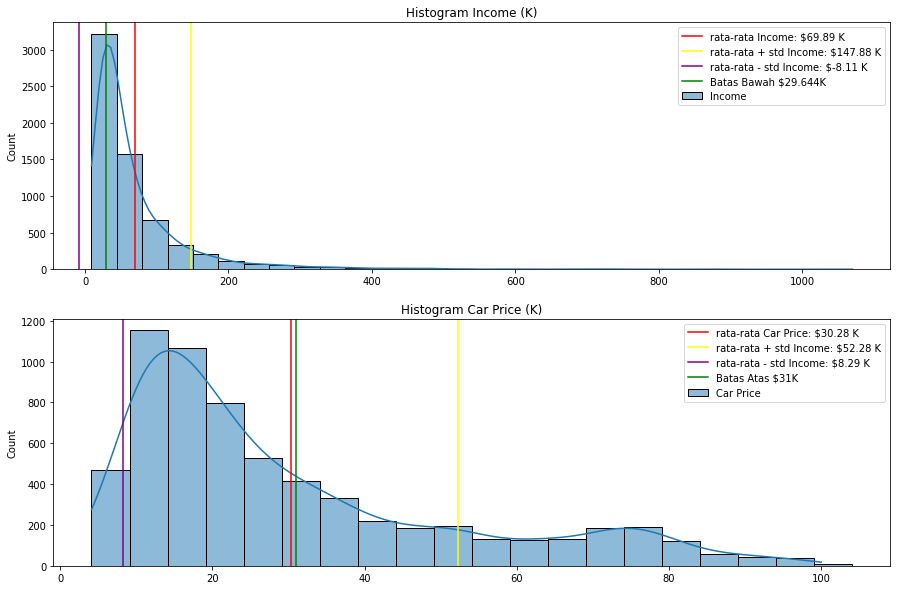

In [23]:
plt.figure(figsize=(15,10))

ax1 = plt.subplot(211)
plt.title("Histogram Income (K)")
sns.histplot(df_income,kde=True,bins=30,label='Income')
# Garis Rata - Rata
plt.axvline(df_income.mean()[0],color='red',label=f'rata-rata Income: ${round((df_income.mean()[0]),2)} K')
# Garis Rata - Rata + Std
plt.axvline(df_income.mean()[0]+df_income.std(ddof=1)[0],color='yellow',label=f'rata-rata + std Income: ${round((df_income.mean()[0]+df_income.std(ddof=1)[0]),2)} K')
# Garis Rata - Rata - Std
plt.axvline(df_income.mean()[0]-df_income.std(ddof=1)[0],color='purple',label=f'rata-rata - std Income: ${round((df_income.mean()[0]-df_income.std(ddof=1)[0]),2)} K')
plt.axvline(batas_bawah_rataan_sampel_99[0],color='green',label=f'Batas Bawah ${round(batas_bawah_rataan_sampel_99[0],3)}K')


plt.legend()

plt.subplot(212)
plt.title("Histogram Car Price (K)")
sns.histplot(df_car,kde=True,binwidth=car_price_bins_size,label='Car Price')
# Garis Rata - Rata
plt.axvline(df_car.mean()[0],color='red',label=f'rata-rata Car Price: ${round((df_car.mean()[0]),2)} K')
# Garis Rata - Rata + Std
plt.axvline(df_car.mean()[0]+df_car.std(ddof=1)[0],color='yellow',label=f'rata-rata + std Income: ${round((df_car.mean()[0]+df_car.std(ddof=1)[0]),2)} K')
# Garis Rata - Rata - Std
plt.axvline(df_car.mean()[0]-df_car.std(ddof=1)[0],color='purple',label=f'rata-rata - std Income: ${round((df_car.mean()[0]-df_car.std(ddof=1)[0]),2)} K')
plt.axvline(batas_atas[0],color='green',label=f'Batas Atas ${round(batas_atas[0])}K')
plt.legend()

plt.show()

In [24]:
#Statik Data Income - Car Price
n_pop = len(df_inc_car)
x_bar_pop = x_bar - x_bar_car
s_car = df_car.std() # method ini digunakan untuk stdev sampel

print("Total data sampel\t: {}".format(n_car))
print("Rata-rata data sampel\t: {}".format(x_bar_car))
print("Stdev data sampel\t: {}".format(s_car))


Total data sampel	: 6400
Rata-rata data sampel	: Car price    30.283625
dtype: float64
Stdev data sampel	: Car price    21.998228
dtype: float64


In [25]:
df_inc_diatas_60 =  df_inc_car[df_inc_car["Income"]>60]
persentasi_prospektif = len(df_inc_diatas_60)/len(df_inc_car) * 100
persentasi_prospektif

35.65625

In [26]:
df_promosi = df_inc_diatas_60[df_inc_diatas_60["Car price"]>15]
peresentasi_promosi = len(df_promosi)/len(df_inc_car) * 100
jlh_promosi_populasi = int(1200000 * peresentasi_promosi / 100)
print(jlh_promosi_populasi)

427875


In [27]:
def to_indikator_prospektif(x):
    if x > 60: return 1
    return 0

indikator_prospektif = df_inc_car["Income"].apply(to_indikator_prospektif)
mean_indikator_prospektif = indikator_prospektif.mean()
std_s_indikator_prospektif = indikator_prospektif.std(ddof=1)
n_indikator_prospektif = len(indikator_prospektif)

In [28]:
# menghitung estimasi 2 sisi interval proposi calon nasabah prospektif secara keseluruhan populasi berdasarkan rataan indikator prospektif

alpha = 0.05

# mencari nilai t_alpha_half sehingga P(T>t_alpha_half) = 1 - alpha/2
z_alpha_half = stats.norm.ppf(1-alpha/2, loc=0, scale=1)

# menghitung standard error berdasarkan formula estimasi
standard_error = z_alpha_half * std_s_indikator_prospektif / np.sqrt(n_indikator_prospektif)

# menghitung batas bawah dan batas atas
batas_bawah_prospektif = mean_indikator_prospektif - standard_error
batas_atas_prospektif  = mean_indikator_prospektif + standard_error

print("Estimasi 2 sisi proporsi calon nasabah prospektif")
print("-------------------------------")
print("Total data indikator prospektif\t: {}".format(n_indikator_prospektif))
print("Rata-rata data indikator prospektif : {}".format(mean_indikator_prospektif))
print("Stdev data indikator prospektif\t: {}".format(std_s_indikator_prospektif))
print("\n")
print("Tingkat kepercayaan estimasi\t: {}".format(1-alpha))
print("Batas bawah interval estimasi\t: {}".format(batas_bawah_prospektif))
print("Batas atas interval estimasi\t: {}".format(batas_atas_prospektif))
print("\n")
print("Batas bawah interval estimasi persentase calon nasabah prospektif secara keseluruhan\t: {}%".format(round(batas_bawah_prospektif*100,3)))
print("Batas atas interval estimasi persentase calon nasabah prospektif secara keseluruhan\t: {}%".format(round(batas_atas_prospektif*100,3)))

Estimasi 2 sisi proporsi calon nasabah prospektif
-------------------------------
Total data indikator prospektif	: 6400
Rata-rata data indikator prospektif : 0.3565625
Stdev data indikator prospektif	: 0.4790214368469326


Tingkat kepercayaan estimasi	: 0.95
Batas bawah interval estimasi	: 0.3448266904494673
Batas atas interval estimasi	: 0.3682983095505327


Batas bawah interval estimasi persentase calon nasabah prospektif secara keseluruhan	: 34.483%
Batas atas interval estimasi persentase calon nasabah prospektif secara keseluruhan	: 36.83%


In [29]:
def to_indikator_promosi(x):
    if x[0] > 60 and x[1] > 15: return 1
    return 0

indikator_promosi = df_inc_car.apply(to_indikator_promosi, axis=1)
mean_indikator_promosi = indikator_promosi.mean()
sdf_s_indikator_promosi = indikator_promosi.std(ddof=1)
n_indikator_promosi = len(indikator_promosi)
mean_indikator_promosi


0.3565625

In [30]:
N = 1200000

batas_bawah_promosi = int(batas_bawah_prospektif*N)
batas_atas_promosi = int(batas_atas_prospektif*N)
print(f"Banyaknya calon nasabah yang akan diberikan promosi ada di interval {batas_bawah_promosi:,} sampai {batas_atas_promosi:,} dengan tingkat kepercayaan 95%.")

Banyaknya calon nasabah yang akan diberikan promosi ada di interval 413,792 sampai 441,957 dengan tingkat kepercayaan 95%.


In [31]:
# menghitung statistik data sampel income

n_income = len(df_income)
x_bar_income = df_income.mean()
s_income = df_income.std() # method ini digunakan untuk stdev sampel

print("Total data sampel\t: {}".format(n_income))
print("Rata-rata data sampel\t: {}".format(x_bar_income.iloc[0]))
print("Stdev data sampel\t: {}".format(s_income.iloc[0]))

# menghitung estimasi 1 sisi dari bawah interval rataan populasi Income berdasarkan rataan sampel Income
alpha = 0.05
# mencari nilai z_alpha sehingga P(Z>z_alpha) = 1 - alpha
z_alpha = stats.norm.ppf(1-alpha, loc=0, scale=1)

# menghitung batas bawah
batas_bawah_rataan_income = x_bar - z_alpha * s / np.sqrt(n)

print("Estimasi 1 sisi dari atas rataan populasi")
print("-------------------------------")
print("Total data sampel\t: {}".format(n))
print("Rata-rata data sampel\t: {}".format(x_bar.iloc[0]))
print("Stdev data sampel\t: {}".format(s.iloc[0]))
print("\n")
print("Tingkat kepercayaan estimasi\t: {}".format(1-alpha))
print("Batas bawah interval estimasi\t: {}".format(batas_bawah_rataan_income.iloc[0]))

Total data sampel	: 6400
Rata-rata data sampel	: 69.88703125
Stdev data sampel	: 77.99393243336522
Estimasi 1 sisi dari atas rataan populasi
-------------------------------
Total data sampel	: 6400
Rata-rata data sampel	: 69.88703125
Stdev data sampel	: 77.99393243336522


Tingkat kepercayaan estimasi	: 0.95
Batas bawah interval estimasi	: 68.28342371695965
